# Interpolative Maximization
* To be used as a fast proxy for more robust maximization
* The user must take care that input data is well sampled so that the method returns reasonable results (i.e. junk in --> junk out )
* NOTE that this algorithm is MOST USEFUL for approximating the location of the true max, rather than its value. 

## Setup Environment

In [47]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
# %matplotlib auto
%matplotlib inline
# Setup plotting backend
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.formatter.useoffset'] = False
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
#
from numpy import *
from numpy.fft import ifft,fftshift,fftfreq,fft
from glob import glob as find
from scipy.interpolate import UnivariateSpline as spline
#
from positive import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Ceate sample data with one local max, and locally code the interpolative max algorithm

6 1 3
    intrp_max 	 = 	 0.999932
intrp_arg_max 	 = 	 2.141174


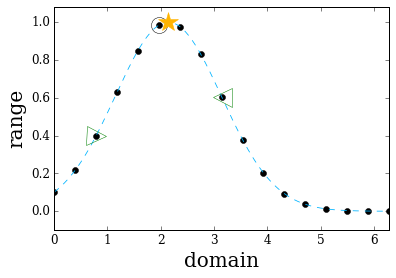

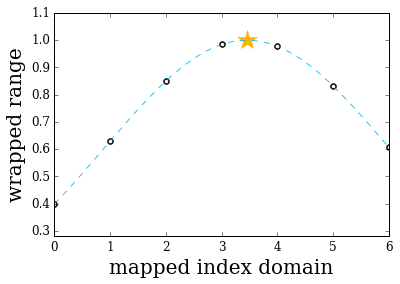

In [155]:

#
N = 17
t = 2*pi*linspace(0,1,N)

#
# y = sin( t + pi/2 + 0.3242 )
y = exp( -0.5*(t-pi+1)**2 )

#
ts = linspace( min(t), max(t), 2e2 )
ys = spline(t,y,s=0,k=4)(ts)

#
clr= rgb(3)

#
fig1 = figure()
plot( t,y, 'ok' )
plot( ts,ys, color=clr[0], linestyle='--' )

#
dy = diff( lim(y) )*0.1
ylim( array([-1,1])*dy + lim(y) )
xlim( lim(t) )

#
xlabel('domain')
ylabel('range')

#
k_max = argmax( y )
t_max = t[k_max]
y_max = y[k_max]

#
plot( t_max, y_max, 'o', mfc='none', mec='k', ms=16 )

# Determine points to right and left of numerical max 

# This many points to right and left of numerical max will be taken
pad = 3

#
a = k_max - pad
b = k_max + pad

#
left = arange( a, k_max )
right = arange( k_max, b+1 )
# 
raw_space = hstack( [left,right] )
#
space = mod( raw_space, len(y)-1 )
#
raw_kspace = range( len(space) )

#
plot( t[ space[0] ], y[ space[0] ], '>', mfc='none', mec='g', ms = 19 )
plot( t[ space[-1] ], y[ space[-1] ], '<', mfc='none', mec='g', ms = 19 )

#
raw_suby = y[space]

# -------------------------------------------- #
# Enforce adjacent symmetry about numerical max
# -------------------------------------------- #
left_k  =  1 + argmin( abs(raw_suby[0] - raw_suby[1:]) )
right_k =  argmin( abs(raw_suby[-1] - raw_suby[:-1]) )
center_k = argmax(raw_suby)
print left_k, right_k, center_k

#
fig2 = figure()
plot( raw_kspace, raw_suby, 'ok' )

# IF the clostest point is on the other side of the peak AND there is an assymetry detected
# THEN make more symmetric by removing points from left or right
mask = range( len(raw_suby) )
if (right_k < center_k) and (left_k != len(raw_suby)-1) :
    mask = range( right_k, len(raw_suby) )
elif (left_k > center_k) and (right_k != 0) :
    mask = range( 0, left_k+1 )

# Apply the mask
kspace = array([ raw_kspace[v] for v in mask ])
suby = array([ raw_suby[v] for v in mask ])


# -------------------------------------------- #
# Interpolate local space to estimate max
# -------------------------------------------- #
intrp_suby = spline( kspace, suby, k=4, s=0 )
# Location of the max is determined analytically, given the local spline model
kspace_maxes = intrp_suby.derivative().roots()
kspace_max = kspace_maxes[ argmax( intrp_suby(kspace_maxes) ) ]

#
plot( kspace_max, intrp_suby(kspace_max), '*', ms=20, mec=clr[-1], mfc=clr[-1] )
kspace_sm = linspace(min(kspace),max(kspace))
plot( kspace_sm, intrp_suby(kspace_sm), color=clr[0], linestyle='--' )
plot( kspace, suby, 'ow', ms=4 )

#
dy = diff( lim(suby) )*0.2
ylim( array([-1,1])*dy + lim(raw_suby) )
xlim( lim(raw_kspace) )
xlabel('mapped index domain')
ylabel('wrapped range')

max_val = intrp_suby(kspace_max)
index_arg_max = spline( raw_kspace, raw_space, k=1, s=0 )(kspace_max)
arg_max = spline( range(len(t)), t )( index_arg_max )

#
print '    intrp_max \t = \t %f' % max_val
print 'intrp_arg_max \t = \t %f' % arg_max

#
figure( fig1.number )
plot( arg_max, max_val, '*', ms=20, mec=clr[-1], mfc=clr[-1]  )


## Package the code above into a method of the particle.maths package


>> Results of intrp_max:
----------------------------------------
    intrp_max 	 = 	 0.999775
intrp_arg_max 	 = 	 2.141319



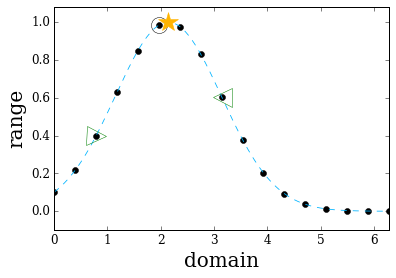

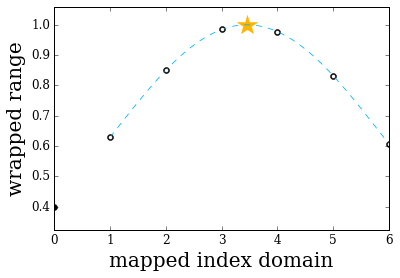

In [159]:
max_val,arg_max = intrp_max( y, domain=t, return_argmax=True, plot=True, verbose=True )

In [160]:
print max_val,arg_max 

0.999775214044 2.14131910899


In [161]:
intrp_argmax( y, domain=t )

2.141319108988243